#Importation des packages

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import os

#Paludisme

Le paludisme est une maladie parasitaire potentiellement mortelle causée par une infection par un protozoaire Plasmodium transmis par un moustique anophèle femelle infectieux.

Le modèle suivant tente de distinguer les cellules infectées par le paludisme de celles qui ne le sont pas.

Répartition de ce exo :

* Chargement de l'ensemble de données : chargez les données et importez les bibliothèques.

* Prétraitement des données :
Lire les images, étiquettes stockées dans 2 dossiers (Parasitisés, Non infectés).

* Afficher les images non infectées et parasitées avec leurs étiquettes respectives.
* Normalisation des données d'image.
* Division des données en test, entrainnement et validation
d'ImageDataGenerator
* Création et formation du modèle
: créez un modèle cnn avec la bibliothèque  KERAS.

* Évaluation : affichez  les métriques d’évaluation et tracer la courbe de validation.



Chargement des données

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import random

import matplotlib.pyplot as plt
# import seaborn as sns
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

examinez quelques exemples de cellules parasitées et non infectées.

In [4]:
FILES_ROOT_DIR = "../../data/cell_images/"
PARASITITED_FILES_DIR=f"{FILES_ROOT_DIR}/Parasitized/"
UNINFECTED_FILES_DIR=f"{FILES_ROOT_DIR}/Uninfected/"
Parasitized = os.listdir(PARASITITED_FILES_DIR)
Uninfected = os.listdir(UNINFECTED_FILES_DIR)

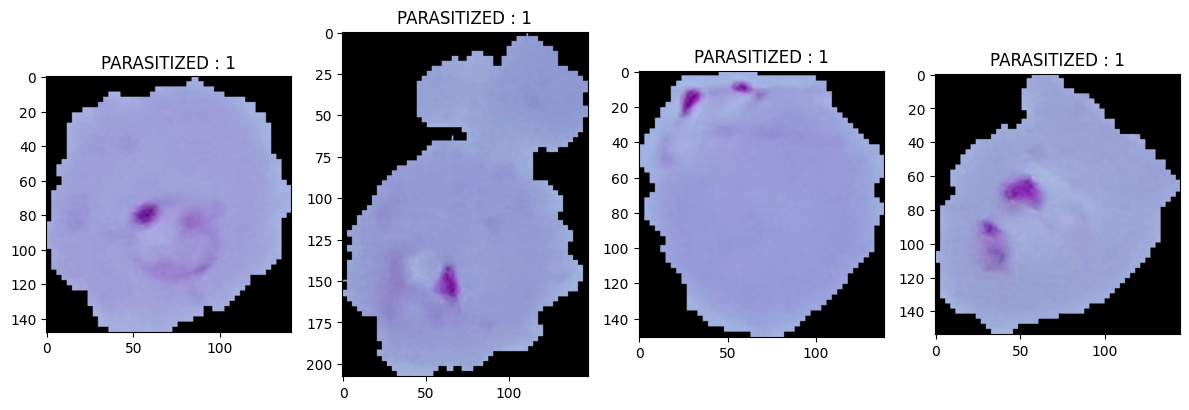

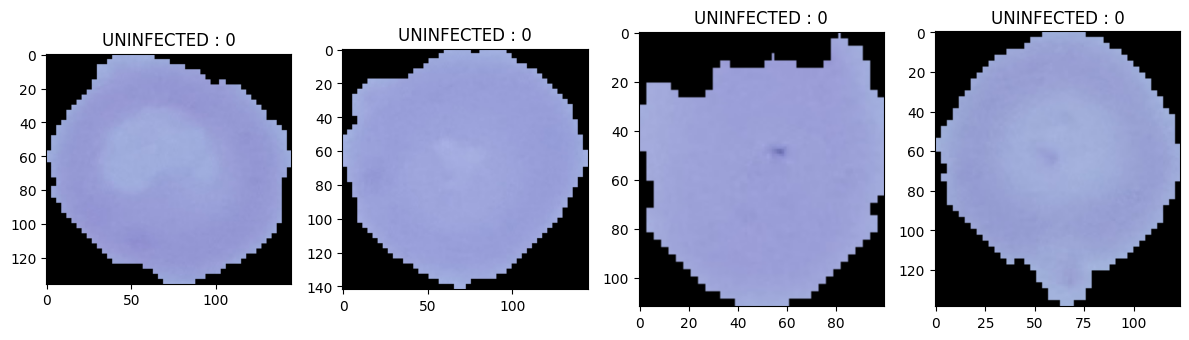

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(PARASITITED_FILES_DIR + Parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(UNINFECTED_FILES_DIR+ Uninfected[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

Les images sont redimensionnées et converties en tableaux avant d'être ajoutées dans une seule liste

In [ ]:
data = []
labels = []0000000000

for img in Parasitized:
    try:
        img_read = plt.imread(PARASITITED_FILES_DIR+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        pass

for img in Uninfected:
    try:
        img_read = plt.imread(UNINFECTED_FILES_DIR+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        pass


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#Visualiser des données

plt.imshow(data[0], cmap='gray')
plt.show()

#Répartition de l'ensemble de données



Les données traitées et mélangées sont désormais divisées en ensembles de formation, de validation et de test.

Une répartition de 80 %-10 %-10 % est suivie


In [14]:
len(labels), len(data)

(27558, 27558)

In [ ]:
X=data
y=labels


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)

X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size=0.5, stratify=Y_test)

# Y_test = np.argmax(Y_test, axis=1)

In [34]:
# print(len(X_train))

#Modèle CNN

Question 1 : Proposez une differentes approche modèle CNN  pour résoudre ce problème.

NB: l'objectif est de Proposer differentes approche pour classifier les cellule infecter et non infecter

NB: Le modèle utilise l'optimiseur Adam, la précision étant la métrique


Question 2: calculer le nombre de parametre pour chaque modele proposez

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
# Première couche convolutive
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))),
# Première couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2))),

# Deuxième couche convolutive
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')),
# Deuxième couche de pooling
model.add(MaxPooling2D(pool_size=(2, 2))),
# Couche Flatten pour passer aux couches denses
model.add(Flatten()),
 # Première couche dense
model.add(Dense(64, activation='relu')),
# Deuxième couche dense
model.add(Dense(32, activation='relu')),
# Couche de sortie (10 classes)
model.add(Dense(10, activation='softmax'))





c:\Users\Admin\Documents\DIT Courses\DL\exam\projet-deeplearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Question 3: Utiliser les données pour entrainner les differents modele proposer

NB : Le modèle est entraîné pendant 10 époques avec une taille de lot de 64 en utilisant la précision comme métrique

Question 4:  utilisé le modele optimale pour prédire   l'ensemble de test.

Question 5 :  Determiner les métriques d’évaluation et tracer la courbe de validation.

#Exercice 2

#Definition des constants

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#ls

#Prepation des données

In [ ]:
filenames = os.listdir("/content/drive/MyDrive/cats_dogs/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
    })

In [ ]:
df.head()

,filename,category
0,dog.1.jpg,1
1,cat.6.jpg,0
2,cat.5.jpg,0
3,cat.7.jpg,0
4,cat.8.jpg,0


#Voir la totalité des données

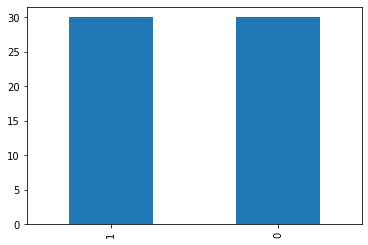

In [ ]:
df['category'].value_counts().plot.bar()

#Voir l'exemple d'image

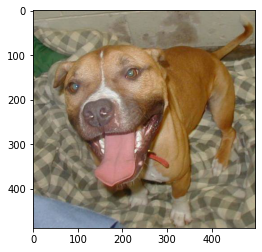

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/cats_dogs/" + sample)
plt.imshow(image)

# création du modèle

Nous définissons l'architecture du CNN comme suit:
Soit une image de dimension IMAGE_SIZE
Une premiere couche composer de 32 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 70 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 128 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une couche de  sortie avec  fonction d'actvation softmax.


In [ ]:
# Implémenter votre code
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Questions

Question 1 : Quelle est le type de cette classification?\
Question 2 : Implémenter le réseau convolutif\
Question 3 : Calculer le nombres de paramètres\
Question 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif\


#Exercice 3

Les réseaux de neurones convolutionnels classiques sont généralement composés d’une succession de couches de convolutions (avec ReLU) avec de plus en plus de filtres,  et dont la dimension spatiale est progressivement réduite par des couches de max pooling possiblement jusqu’à aggregation totale des dimensions spatiales,\
 il ne reste donc plus que la "profondeur" correspondant au nombre de filtres appliqués par la dernière convolution (1 × 1 × C).
 On y ajoute enfin généralement une ou quelques couches linéaires (appelées fully-connected).

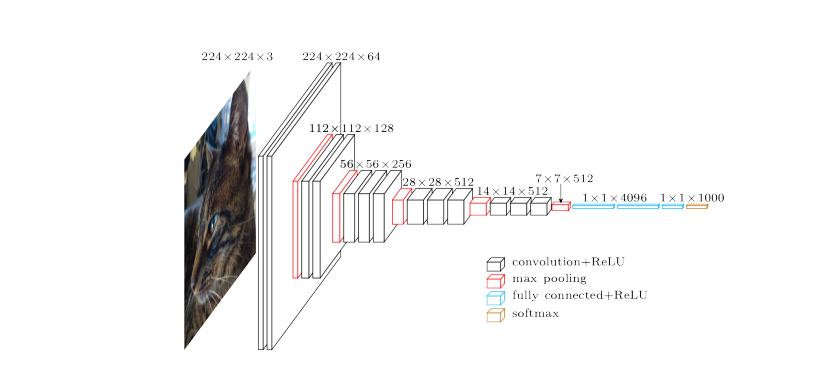

Considérant un seul filtre de convolution de padding p, de stride s et de taille de kernel k, pour une
entrée de taille x × y × z quelle sera la taille de sortie ?\
Combien y a-t-il de parametres à apprendre ?\
Combien de parametres aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de
la même taille ?


Quel interêt voyez-vous à l’usage du max pooling ?


Implementer ce réseau convolutif

#Exercice 4

Nous allons désormais implémenter notre premier réseau convolutionnel que nous allons appliquer à la
base de données CIFAR-10 (Krizhevsky, 2009, c.f. Figure 3). Cette base d’images RGB de 32×32 pixels
comporte 10 classes, 50k images en train et 10k images en test.


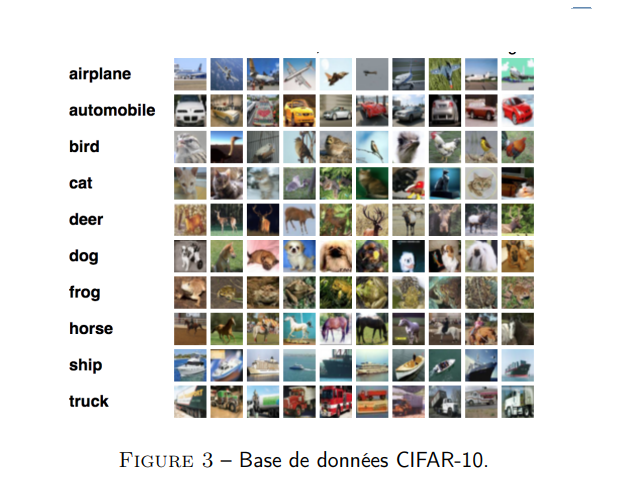

Le réseau que nous allons implémenter a un style proche de l’architecture AlexNet de Krizhevsky et al.\
(2012) adaptée à la base CIFAR-10 dont les images sont plus petites. Il sera composé des couches suivantes :\
— conv1 : 32 convolutions 5×5, suivie de ReLU \
— pool1 : max-pooling 2×2 \
— conv2 : 64 convolutions 5×5, suivie de ReLU \
— pool2 : max-pooling 2×2 \
— conv3 : 64 convolutions 5×5, suivie de ReLU \
— pool3 : max-pooling 2×2 \
— fc4 : fully-connected, 1000 neurones en sortie, suivie de ReLU \
— fc5 : fully-connected, 10 neurones en sortie, suivie de softmax

#Question

Implementer ce réseau convolutif

Pour les convolutions, on veut conserver en sortie les mêmes dimensions spatiales qu’en entrée.\
Quelles valeurs de padding et de stride va-t-on choisir ?\
Pour les max poolings, on veut réduire les dimensions spatiales d’un facteur 2.\
 Quelles valeurs de padding et de stride va-t-on choisir ?\
Pour chaque couche, indiquer la taille de sortie et le nombre de poids à apprendre. \
Commentez cette répartition.\
Quel est donc le nombre total de poids à apprendre\
Comparer cela au nombre d’exemples